# Exploration of Decision Trees on Manufacturing Data

Decision trees are a popular machine learning algorithm used for both classification and regression tasks. It's a graphical representation of a decision-making process that breaks down a complex decision-making task into a series of simpler decisions based on input features. Decision trees are easy to understand, interpret, and visualize, making them a popular choice for various applications.

Here's how a decision tree works:

1. **Structure**: A decision tree consists of nodes and edges. The nodes represent decision points or outcomes, while the edges connecting the nodes represent the decisions or conditions that lead from one node to another.

2. **Root Node**: The topmost node of the tree is called the root node. It represents the initial decision or the starting point of the decision-making process.

3. **Internal Nodes**: These nodes represent intermediate decisions or conditions. They contain a test on a specific feature (attribute) and split the data into subsets based on the outcome of that test.

4. **Leaf Nodes**: Also known as terminal nodes, these nodes represent the final decision or classification outcome. They don't have any outgoing edges and contain the predicted class label (in classification) or the predicted numerical value (in regression).

5. **Feature Tests**: At each internal node, a decision is made based on the value of a specific feature. This decision determines which branch to follow down the tree.

6. **Splitting**: The process of creating internal nodes involves splitting the dataset into subsets based on the values of the selected feature. The goal is to make the subsets as pure as possible, meaning that they contain instances of a single class in classification tasks or exhibit similar numerical values in regression tasks.

7. **Criteria for Splitting**: There are various algorithms for deciding how to split the data at each internal node. Some commonly used criteria include Gini impurity (for classification), mean squared error (for regression), and information gain (for both classification and regression).

8. **Pruning**: Decision trees can sometimes become overly complex and prone to overfitting the training data. Pruning involves removing or merging nodes to simplify the tree and improve its generalization to new, unseen data.

9. **Prediction**: To make a prediction for a new instance, you start at the root node and follow the decision paths through the internal nodes until you reach a leaf node. The class label or regression value associated with that leaf node is the final prediction.

Decision trees have several advantages, including their simplicity, interpretability, and ability to handle both categorical and numerical data. However, they can also suffer from instability, sensitivity to small changes in the data, and a tendency to overfit. To mitigate these issues, techniques like ensemble methods (e.g., Random Forests) are often used in conjunction with decision trees.

Within the entire decision tree, there can also be smaller trees within them, known as sub-trees. A sub-tree must consist of a root node, and at least one leaf node. They may not necessarily have internal nodes.

### Your Turn! 

Looking at the decision tree below, try to identify the words that are blocked out by colour. 

There are 4 fill in the blanks: red, blue, green and yellow.

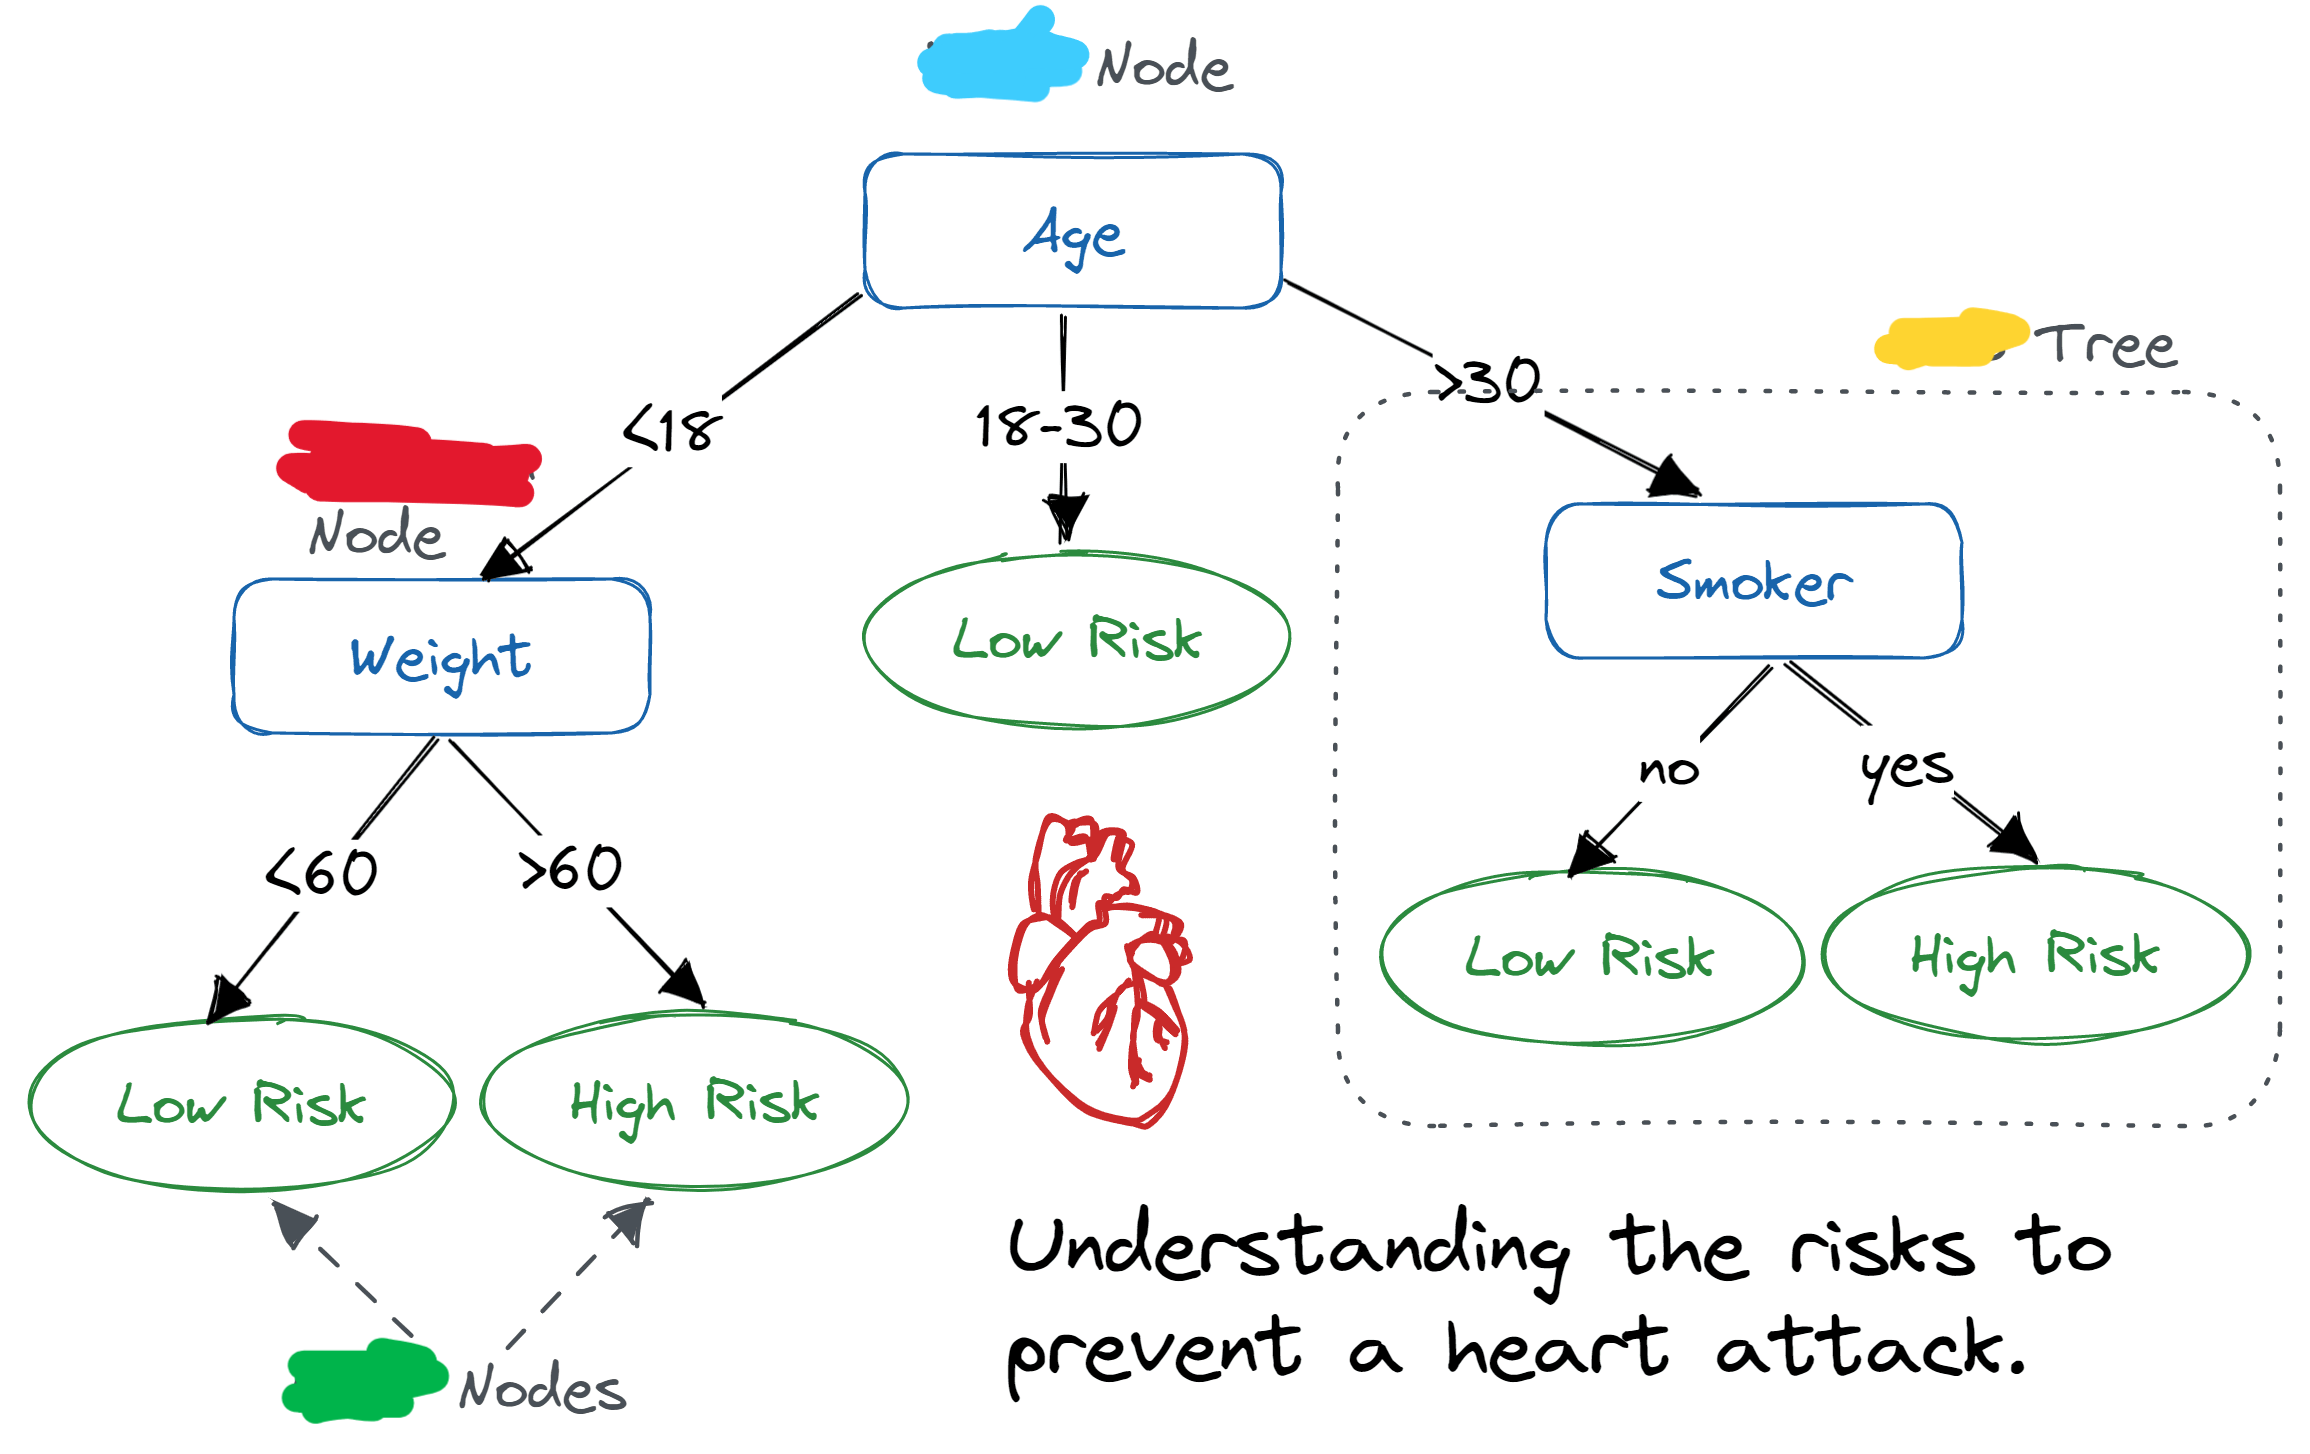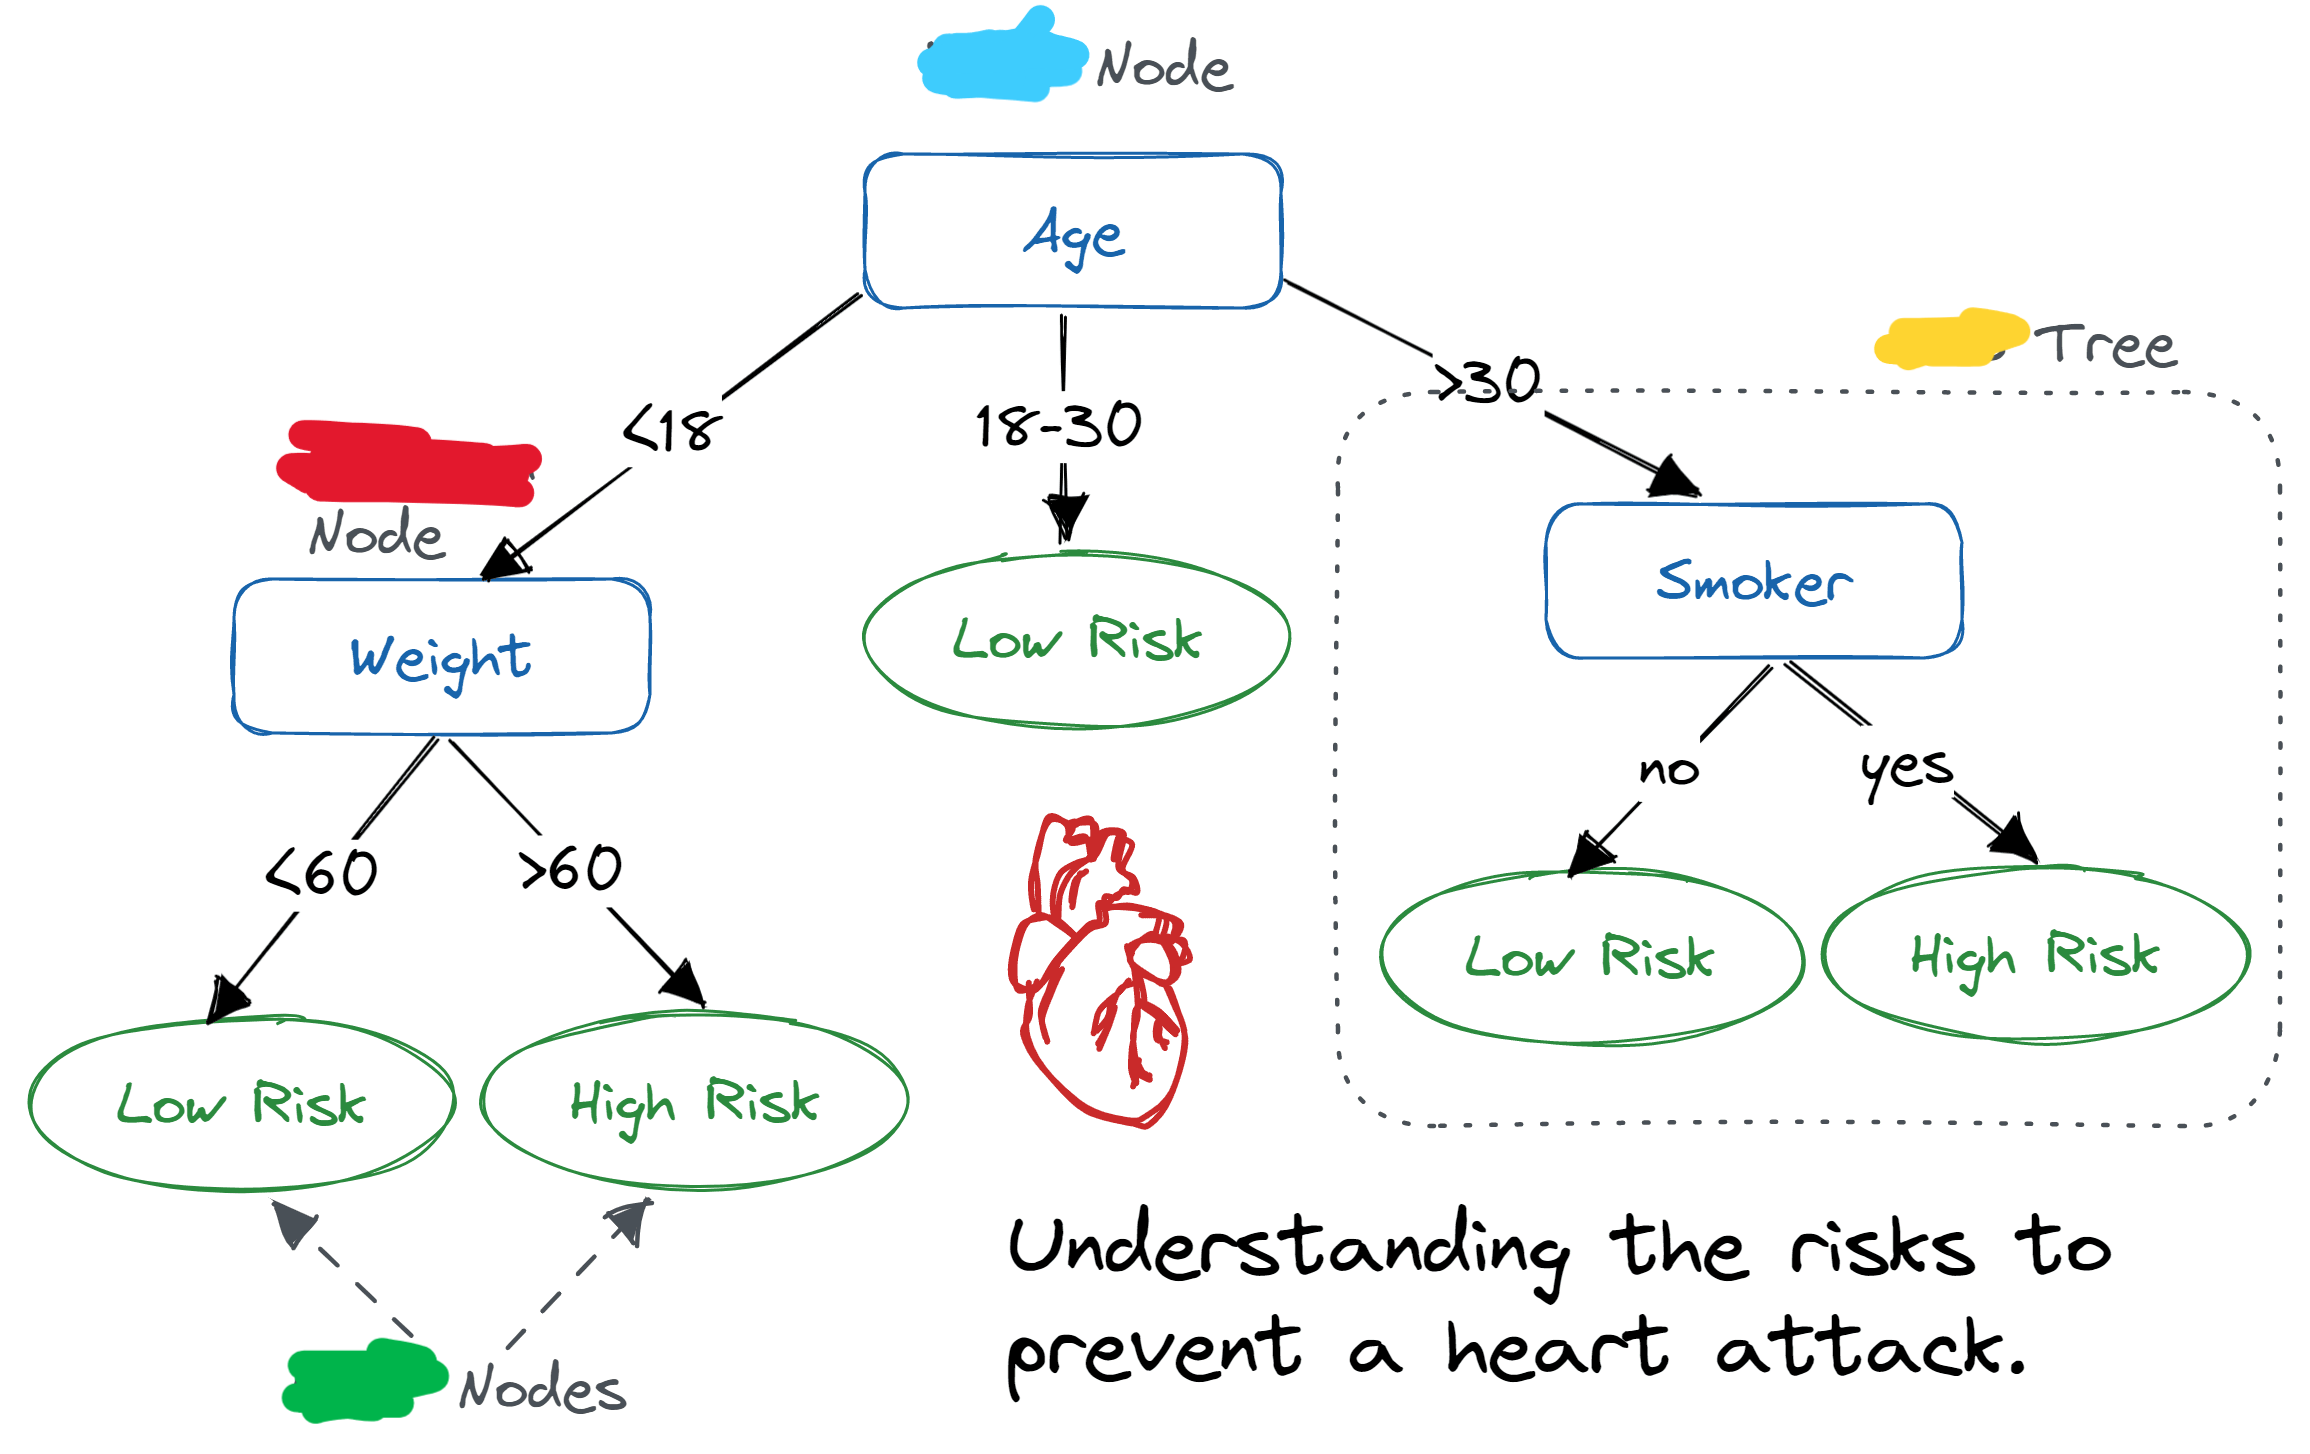

Answers:
- Blue is "root"
- Red is "internal"
- Yellow is "sub"
- Green is "leaf"

### What dataset will we be using?

The dataset that we will be using explores different ecnonomies of scale.

This dataset is fairly simplistic, it aims to analyze how the prices of goods change as the production volume changes (number of units produced). 

If you would like to access the source of the dataset, you can do so here: https://www.kaggle.com/datasets/vinicius150987/manufacturing-cost/data

We are tasked with developing a model that can predict the cost based on the number of units produced. 

In [1]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/EconomiesOfScale.csv')
data.head() # print out only the first few rows, for easy viewing.

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


Let's take a detailed look at our dataset using the ```info()``` function.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


### What does info() tell us?

We have 2 columns, both of which are floats. 

This dataset contains a total of 1000 rows. 

Lastly, this dataset doesn't seem to contain any missing values. 

### Let's conduct some preliminary visualization for our data. 

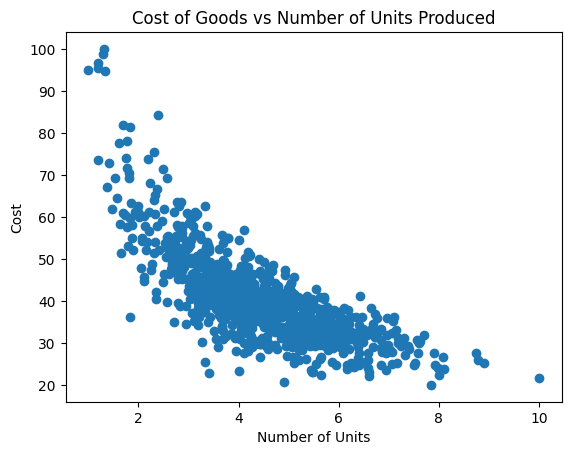

In [5]:
plt.scatter(data["Number of Units"], data["Manufacturing Cost"])

plt.xlabel("Number of Units")
plt.ylabel("Cost")
plt.title("Cost of Goods vs Number of Units Produced")
plt.show()

As we can see above, there seems to be a negative correlation trend between the number of units and their associated cost. 

As the number of units increases, the cost of goods decreases. Logically, this makes sense as wholesale stores which sell in bulk generally can afford to sell at a cheaper cost. 

Now, let's begin our process of actually implementing the decision tree regression model. 

Keep in mind that our goal is to predict a continuous target variable. 

In [6]:
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


Using our dataset, let's separate our target variable from the rest of the input data.

In our case, we only have two columns, so one of them will be the target variable, and the other is the input data. 

Manufacturing Cost will be the target variable, because that's the column we are trying to predict. We will assign this as ```y```.

Number of Units will be the input variable, as that's the independent variable which will do the predicting. Manufacturing Cost ultimately depends on the Number of Units. We will assign this column as ```X```. 

In [7]:
X = data[["Number of Units"]]

y = data[["Manufacturing Cost"]]

Now that we have our X and y data, we need to perform a ```train_test_split``` on it. 

This step is important because it allows us to actually test the quality and performance of our model, using data that it has not seen before. This unseen data will come from a part of the ```X``` data. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The next step is to actually create  a decision tree regressor. This can be done via the following:

In [69]:
regressor = DecisionTreeRegressor(max_depth=5)

Now, we must actually fit the decision tree regressor to the training data.

In [70]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Using the model that we just trained, let's call the ```predict()``` function on a smaller chunk of data that the model has never seen before.

In [71]:
y_pred = regressor.predict(X_test)

# Taking a look at the first 5 predicted values
y_pred[:5]

array([29.79376719, 33.47054283, 43.43709572, 38.62311704, 38.62311704])

Now that we have our predicted values, let's see how to obtain an accuracy metric for our particular model.

Recall that for classification decision trees, their score is measured by metrics such as accuracy, percision, etc. 

However, for regression decision trees, their score is measured by the R-squared score (R2).

The R-squared (R2) score is a statistical measure that quantifies how well a regression model fits the observed data. It represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. R2 ranges from 0 to 1, with higher values indicating a better fit. A score of 0 means the model does not explain any variance, while 1 means it perfectly explains all the variance. R2 helps assess the model's predictive power, with higher values indicating better predictive accuracy.

To obtain the R2 score in python, we can use the built-in ```r2_score``` function included in the scikit-learn library. 

In [72]:
r2 = r2_score(y_test, y_pred)

r2

0.7375760794315902

So, we obtain a r2 score of around 72%, which is not bad. 

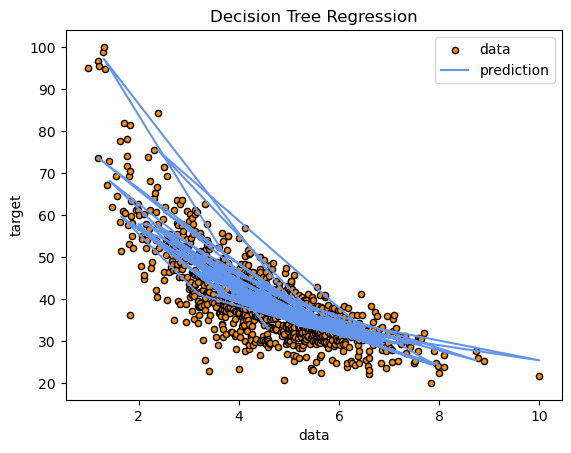

In [60]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Making Improvements

Let's see how we can use GridSearchCV to optimize our parameter searchibng process.

In [61]:
# Import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Define a range of max_depth values to search
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform grid search with cross-validation to find the best max_depth
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best max_depth from the grid search
best_max_depth = grid_search.best_params_['max_depth']

# Create a decision tree regressor with the best max_depth
best_regressor = DecisionTreeRegressor(max_depth=best_max_depth)

# Fit the best regressor to the training data
best_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = best_regressor.predict(X_test)

# Calculate the R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Print the best max_depth and R2 score
print(f'Best max_depth: {best_max_depth}')
print(f'R2 Score: {r2:.2f}')


Best max_depth: 3
R2 Score: 0.74
